## CREANDO GRÁFICOS CON MATLPLOTLIB

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [31]:
# Creando una función para definir la amplitud de la función Seno
x = np.linspace(0, 540, 100)

def deg_to_rad(angle) :
    return math.pi*angle/180
    

def generate_sin(amplitud, freq_angular, dominio) :
    rango = []
    for value in dominio :
        rango.append( amplitud*math.sin( deg_to_rad(value*freq_angular) ) )
    return rango
# Generando el rango de valores


### Graficando la señal generada

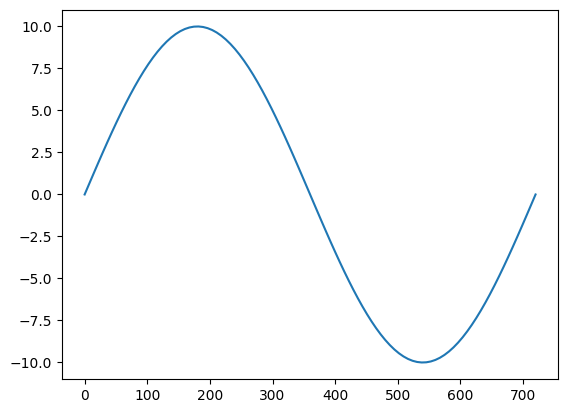

In [30]:
y = generate_sin(10, 50, x)
plt.plot(x, y)
plt.show()
# Guardar una imagen
# plt.savefig("cuadratica.jpg")
# plt.close()

### Cuantizando la señal generada
    1. Generar los bits de trabajo
    2. Crear el rango de valores para la asignación